In [1]:
# Machine Learning
# Algoritmo Naive Bayes

In [2]:
# Import das bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [3]:
# carregamento da base de dados e definição dos previsores(variáveis independentes - X) e a classe(variável dependente - Y)
credito = pd.read_csv('./dados/Credit.csv')
credito.shape

(1000, 21)

In [4]:
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [6]:
# Formato de matriz
previsores = credito.iloc[:, 0:20].values
classe = credito.iloc[:, 20].values

In [7]:
# Transformação dos atributos categóricos em atributos numéricos, passando o índice de cada coluna categórica
# Precisamos criar um objeto para cada atributo categórico, pois na sequencia vamos executar o processo de encoding novamente para o registro de teste
# Se forem utilizados objetos diferentes, o número atribuido a cada valor será diferente, o que deixará o teste inconsistente
labelencoder1 = LabelEncoder()
previsores[:, 0] = labelencoder1.fit_transform(previsores[:, 0])

labelencoder2 = LabelEncoder()
previsores[:, 2] = labelencoder2.fit_transform(previsores[:, 2])

labelencoder3 = LabelEncoder()
previsores[:, 3] = labelencoder3.fit_transform(previsores[:, 3])

labelencoder4 = LabelEncoder()
previsores[:, 5] = labelencoder4.fit_transform(previsores[:, 5])

labelencoder5 = LabelEncoder()
previsores[:, 6] = labelencoder5.fit_transform(previsores[:, 6])

labelencoder6 = LabelEncoder()
previsores[:, 8] = labelencoder6.fit_transform(previsores[:, 8])

labelencoder7 = LabelEncoder()
previsores[:, 9] = labelencoder7.fit_transform(previsores[:, 9])

labelencoder8 = LabelEncoder()
previsores[:, 11] = labelencoder8.fit_transform(previsores[:, 11])

labelencoder9 = LabelEncoder()
previsores[:, 13] = labelencoder9.fit_transform(previsores[:, 13])

labelencoder10 = LabelEncoder()
previsores[:, 14] = labelencoder10.fit_transform(previsores[:, 14])

labelencoder11 = LabelEncoder()
previsores[:, 16] = labelencoder11.fit_transform(previsores[:, 16])

labelencoder12 = LabelEncoder()
previsores[:, 18] = labelencoder12.fit_transform(previsores[:, 18])

labelencoder13 = LabelEncoder()
previsores[:, 19] = labelencoder13.fit_transform(previsores[:, 19])

In [8]:
# Divisão da base de dados entre treinamento e teste(70% pra treinar e 30% para testar)
X_treinamento, X_teste, Y_treinamento, Y_teste = train_test_split(previsores, 
                                                                  classe, 
                                                                  test_size = 0.3, 
                                                                  random_state = 0)
X_teste

array([[2, 36, 3, ..., 1, 1, 1],
       [0, 9, 3, ..., 2, 0, 0],
       [0, 18, 3, ..., 1, 1, 1],
       ...,
       [0, 24, 1, ..., 1, 0, 1],
       [1, 27, 4, ..., 1, 1, 1],
       [1, 12, 3, ..., 1, 0, 1]], dtype=object)

In [9]:
# Criação e treinamento do modelo(geração da tabela de probabilidade)
naive_bayes = GaussianNB()
naive_bayes.fit(X_treinamento, Y_treinamento)

GaussianNB()

In [14]:
# Previsões utilizando os registros de teste
previsoes = naive_bayes.predict(X_teste)
# previsoes

In [12]:
# geração da matriz de confusão e cálculo da taxa de acerto e erro
confusao = confusion_matrix(Y_teste, previsoes)
confusao
# 41 VP
# 172 VN
# 45 FN
# 42 FP 

array([[ 41,  45],
       [ 42, 172]])

In [15]:
taxa_acerto = accuracy_score(Y_teste, previsoes)
taxa_erro = 1 - taxa_acerto
taxa_acerto
# 71%

0.71

/home/alison/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


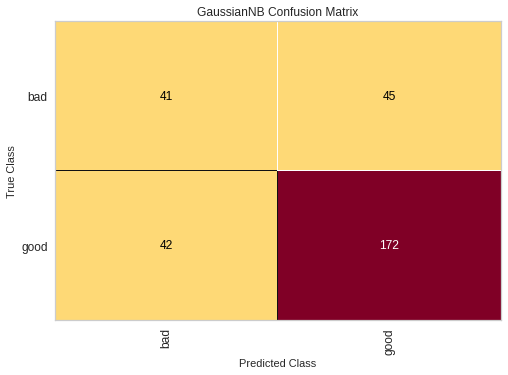

In [16]:
# Visualização da matriz de confusão melhorada com yellowbrick
# warning interno da biblioteca yellowbrick, já está na ultima versão(sem solução para o warning no momento)
v = ConfusionMatrix(GaussianNB())
v.fit(X_treinamento, Y_treinamento)
v.score(X_teste, Y_teste)
v.poof()

In [20]:
# Previsão com novo registro, transformando os atributos categóricos em numéricos
novo_credito = pd.read_csv('./dados/NovoCredit.csv')
novo_credito.shape

(1, 20)

In [21]:
# Usamos o mesmo objeto que foi criado antes, para manter o padrão dos dados
# Chamamos somente o método 'transform', pois a adaptação dos dados(fit), já foi feito anteriormente
novo_credito = novo_credito.iloc[:, 0:20].values
novo_credito[:, 0] = labelencoder1.fit_transform(novo_credito[:, 0])
novo_credito[:, 2] = labelencoder2.fit_transform(novo_credito[:, 2])
novo_credito[:, 3] = labelencoder3.fit_transform(novo_credito[:, 3])
novo_credito[:, 5] = labelencoder4.fit_transform(novo_credito[:, 5])
novo_credito[:, 6] = labelencoder5.fit_transform(novo_credito[:, 6])
novo_credito[:, 8] = labelencoder6.fit_transform(novo_credito[:, 8])
novo_credito[:, 9] = labelencoder7.fit_transform(novo_credito[:, 9])
novo_credito[:, 11] = labelencoder8.fit_transform(novo_credito[:, 11])
novo_credito[:, 13] = labelencoder9.fit_transform(novo_credito[:, 13])
novo_credito[:, 14] = labelencoder10.fit_transform(novo_credito[:, 14])
novo_credito[:, 16] = labelencoder11.fit_transform(novo_credito[:, 16])
novo_credito[:, 18] = labelencoder12.fit_transform(novo_credito[:, 18])
novo_credito[:, 19] = labelencoder13.fit_transform(novo_credito[:, 19])

In [22]:
# Resultado da previsão
naive_bayes.predict(novo_credito)

array(['good'], dtype='<U4')

In [ ]:
# Há 71% de chance de que o novo crédito seja um bom pagador